In [132]:
# This is code from a previous lesson I just loaded it here

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
# Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/crytocurrency/listings/latest'

parameters = {
    'start' : '1',
    'limit' : '5000',
    # limit is the # of records to limit the results to, this can be changed to see more or less such as 100 records
    'convert' : 'USD'
}

headers = {
    'Accepts' : 'application/json',
    'X-CMC_PRO_API_KEY' : '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509'
}

session = Session()
session.headers.update(headers)

try:
    response = session.get(url, params=parameters)
    data = json.loads(response.text)
    #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
    print(e)

# Note:  I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

# If that didn't work try using the local host URL as shown in the video

# I ran this and is appears to work

In [50]:
type(data)

dict

In [133]:
import pandas as pd

# This allows you to see all the columns not just 15

pd.set_option('display.max_columns', None)

#This statement would allow us to see all rows - pd.set_option('display.max_rows', None)

In [134]:
# This normalized the data and make it a pretty dataframe

pd.json_normalize(data['data'])

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
0,1,Bitcoin,BTC,bitcoin,12039,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,19852746,19852746,False,NaN,1,NaN,NaN,NaN,2025-04-17T22:09:00.000Z,8.499211e+04,2.232309e+10,-24.6458,-0.038919,0.637130,6.761602,3.505786,-12.501647,-18.732184,1.687327e+12,63.0852,1.784834e+12,NaN,2025-04-17T22:09:00.000Z,NaN,NaN,NaN,NaN,NaN
1,1027,Ethereum,ETH,ethereum,10135,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120698109.340149,120698109.340149,True,NaN,2,NaN,NaN,NaN,2025-04-17T22:09:00.000Z,1.588789e+03,1.215867e+10,-17.1808,0.340072,0.048471,4.102514,-16.830003,-40.780474,-54.387373,1.917638e+11,7.1692,1.917638e+11,NaN,2025-04-17T22:09:00.000Z,NaN,NaN,NaN,NaN,NaN
2,825,Tether USDt,USDT,tether,124574,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,144804996163.49295,148032435825.052094,True,NaN,3,NaN,NaN,NaN,2025-04-17T22:08:00.000Z,1.000080e+00,4.726284e+10,-22.0795,0.002315,0.004557,0.068676,0.028171,-0.014365,-0.008659,1.448166e+11,5.4133,1.480443e+11,NaN,2025-04-17T22:08:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7
3,52,XRP,XRP,xrp,1590,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,58338141684,99986253154,False,NaN,4,NaN,NaN,NaN,2025-04-17T22:09:00.000Z,2.076295e+00,2.486927e+09,-32.2410,0.267770,-1.323189,5.343273,-8.183225,-24.760768,-36.773927,1.211272e+11,4.5284,2.076295e+11,NaN,2025-04-17T22:09:00.000Z,NaN,NaN,NaN,NaN,NaN
4,1839,BNB,BNB,bnb,2470,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,140890988.03,140890988.03,False,NaN,5,NaN,NaN,NaN,2025-04-17T22:09:00.000Z,5.914700e+02,1.394534e+09,-3.8175,0.009217,1.111680,2.813075,-5.821438,-13.053640,-18.274660,8.333279e+10,3.1166,8.333279e+10,NaN,2025-04-17T22:09:00.000Z,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,32492,Dinero,DINERO,dinero-xyz,14,2024-08-05T00:45:08.000Z,"[staking, ethereum-ecosystem, defi-2]",1.300000e+09,0,1094645229,False,NaN,4996,4.249733e+08,7.705587e+06,NaN,2025-04-17T22:09:00.000Z,1.813193e-02,4.158033e+04,305.9600,0.220458,7.205117,15.291197,-14.259008,-65.958734,-86.977222,0.000000e+00,0.0000,2.357151e+07,NaN,2025-04-17T22:09:00.000Z,1027.0,Ethereum,ETH,ethereum,0x6DF0E641FC9847c0c6Fde39bE6253045440c14d3
4996,7411,Covalent,CQT,covalent,63,2020-10-14T00:00:00.000Z,"[ai-big-data, enterprise-solutions, defi, ethe...",1.000000e+09,0,1000000000,False,NaN,4997,8.561758e+08,2.410946e+06,NaN,2025-04-17T22:09:00.000Z,2.815947e-03,1.359472e+04,233.1181,-0.294457,-2.068456,10.510740,-19.349250,-36.010851,-40.230063,0.000000e+00,0.0000,2.815947e+06,NaN,2025-04-17T22:09:00.000Z,1027.0,Ethereum,ETH,ethereum,0xD417144312DbF50465b1C641d016962017Ef6240
4997,8487,TBCC,TBCC,tbcc-labs,21,2021-02-16T00:00:00.000Z,[bnb-chain-ecosystem],1.000000e+09,0,1000000000,False,NaN,4998,1.000000e+09,8.050633e+05,NaN,2025-04-17T22:09:00.000Z,8.050633e-04,1.352354e+04,1226.9535,0.054542,-33.339435,-5.329239,-24.996341,15.070550,-3.295616,0.000000e+00,0.0000,8.050633e+05,NaN,2025-04-17T22:09:00.000Z,1839.0,BNB Smart Chain (BEP20),BNB,bnb,0xf29480344d8e21efeab7fde39f8d8299056a7fea
4998,10439,StakeWise,SWISE,

In [8]:
# Everything above was from the previous tutorial

# Now we are going to begin automating the data

In [85]:
# First we want to add a timestamp to the data to know when the data was run

# This is from the previous statment and we're adding the timestamp coulumn and add it to all to a dataframe

# And run dataframe

pd1 = pd.json_normalize(data['data'])
pd1['timestamp'] = pd.to_datetime('now')

pd1

# Timestamp coulumn is now added to the end of the columns

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12039,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,19852728,19852728,False,NaN,1,NaN,NaN,NaN,2025-04-17T21:03:00.000Z,8.510466e+04,2.170648e+10,-27.2621,0.169874,0.993849,6.568743,3.731151,-12.215580,-18.680500,1.689560e+12,63.1422,1.787198e+12,NaN,2025-04-17T21:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-17 16:33:09.938753
1,1027,Ethereum,ETH,ethereum,10135,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120698109.340149,120698109.340149,True,NaN,2,NaN,NaN,NaN,2025-04-17T21:03:00.000Z,1.583903e+03,1.166137e+10,-12.8617,-0.086647,0.743274,3.572333,-16.932528,-40.722316,-54.960581,1.911741e+11,7.1443,1.911741e+11,NaN,2025-04-17T21:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-17 16:33:09.938753
2,825,Tether USDt,USDT,tether,124569,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,144804996163.49295,148032435825.052094,True,NaN,3,NaN,NaN,NaN,2025-04-17T21:02:00.000Z,1.000055e+00,4.800897e+10,-20.6347,-0.004704,0.010995,0.062934,0.038617,-0.003941,-0.018032,1.448130e+11,5.4117,1.480406e+11,NaN,2025-04-17T21:02:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-04-17 16:33:09.938753
3,52,XRP,XRP,xrp,1590,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,58338141684,99986253154,False,NaN,4,NaN,NaN,NaN,2025-04-17T21:03:00.000Z,2.073466e+00,2.516469e+09,-31.3367,0.231408,-0.931153,4.501614,-8.121640,-24.573395,-36.715124,1.209622e+11,4.5202,2.073466e+11,NaN,2025-04-17T21:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-17 16:33:09.938753
4,1839,BNB,BNB,bnb,2470,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,140890989.33,140890989.33,False,NaN,5,NaN,NaN,NaN,2025-04-17T21:03:00.000Z,5.910197e+02,1.395546e+09,-3.3659,0.017584,1.235577,2.664293,-6.047854,-12.754175,-18.643150,8.326935e+10,3.1118,8.326935e+10,NaN,2025-04-17T21:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-17 16:33:09.938753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,32975,DAC Platform,MEN,metahub-finance,1,2024-09-10T10:54:55.000Z,[polygon-ecosystem],7.000000e+08,0,9686226,False,NaN,4996,9.686226e+06,1.096544e+05,NaN,2025-04-17T21:03:00.000Z,1.132065e-02,1.380665e+04,27.5017,-0.034941,2.602914,0.522824,-50.159350,-65.075551,-63.786933,0.000000e+00,0.0000,7.924456e+06,NaN,2025-04-17T21:03:00.000Z,28321.0,Polygon,POL,polygon-ecosystem-token,0x94b959c93761835f634B8d6E655070C58E2CAa12,2025-04-17 16:33:09.938753
4996,34231,jerry,JERRY,jerry-solana,4,2024-11-26T08:34:13.000Z,"[memes, solana-ecosystem]",1.000000e+09,0,1000000000,False,NaN,4997,1.000000e+09,4.497131e+05,NaN,2025-04-17T21:03:00.000Z,4.497131e-04,1.379422e+04,542.0900,-0.261568,20.255864,2.284859,104.580417,52.718074,-2.474889,0.000000e+00,0.0000,4.497131e+05,NaN,2025-04-17T21:03:00.000Z,5426.0,Solana,SOL,solana,G3s49agBGCXqqhLXGXFtasQgAAMPvXQifyWL5M2Wpump,2025-04-17 16:33:09.938753
4997,23118,Web3Camp,3P,web3camp,10,2023-01-19T12:29:14.000Z,[bnb-chain-ecosystem],5.300000e+13,0,53000000000000,False,NaN,4998,4.631289e+13,5.381197e+04,NaN,2025-04-17T21:03:00.000Z,1.161922e-09,1.373491e+04,11.9087,-2.774839,0.175588,-68.606452,-78.867653,-82.133792,

In [ ]:
# Now we are going to create a script that is going to automate everything above to append new data to the file
# on a set interval of our choosing.

# And export to csv?  I changed this up and it exports to csv and appends new data in the loop up to the 333 times allowed by the API

# Grabbing the code from above then we are going to create a def function

def api_runner():

    global df

    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    # Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/crytocurrency/listings/latest'
    
    parameters = {
        'start' : '1',
        'limit' : '10',
        # limit is the # of records to limit the results to, this can be changed to see more or less such as 100 records
        'convert' : 'USD'
    }
    
    headers = {
        'Accepts' : 'application/json',
        'X-CMC_PRO_API_KEY' : '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509'
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
        #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)

    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df

    if not os.path.isfile(r'C:\Users\mhudd\Python_Crypto_API.csv'):
        df.to_csv(r'C:\Users\mhudd\Python_Crypto_API.csv', header = 'column_names')
    else:
        df.to_csv(r'C:\Users\mhudd\Python_Crypto_API.csv', mode = 'a', header = False)

    df = pd.read_csv(r'C:\Users\mhudd\Python_Crypto_API.csv')




In [190]:
# New we create our script to run the append from above

# The "333" in the for loop comes from the maximum times the loop can be run per day based on the api rules

import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner Completed Successfully')
    sleep(60)  # Sleep for 1 minute
exit()

API Runner Completed Successfully


KeyboardInterrupt: 

In [191]:
# The error above is due to stopping the loop

# The program ran sucessfully and exported 30 records to the csv filepach C:\Users\mhudd\Python_Crypto_API.csv

# Since I read the file back into the console at the end I can run and show results below

df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,12039,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19852746.00000,19852746.00000,False,NaN,1,NaN,NaN,NaN,2025-04-17T22:28:00.000Z,85029.51168,22267015442.02833,-26.09920,0.13457,0.75573,6.70141,3.27892,-12.21289,-18.68674,1688069297967.79370,63.13510,1785619745365.38989,NaN,2025-04-17T22:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-17 17:29:44.843819
1,1,1027,Ethereum,ETH,ethereum,10135,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120698109.34015,120698109.34015,True,NaN,2,NaN,NaN,NaN,2025-04-17T22:28:00.000Z,1589.18332,12126920219.07646,-21.44010,0.22591,0.06771,4.11713,-16.95394,-40.60156,-54.33035,191811421564.36044,7.17350,191811421564.35999,NaN,2025-04-17T22:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-17 17:29:44.843819
2,2,825,Tether USDt,USDT,tether,124575,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'usd...",NaN,144804996163.49295,148032435825.05209,True,NaN,3,NaN,NaN,NaN,2025-04-17T22:27:00.000Z,1.00006,47270835318.25568,-21.95460,0.01486,0.01782,0.06633,0.02533,-0.01404,-0.03364,144813044512.09183,5.41390,148040663556.67999,NaN,2025-04-17T22:27:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-04-17 17:29:44.843819
3,3,52,XRP,XRP,xrp,1590,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,58338141684.00000,99986253154.00000,False,NaN,4,NaN,NaN,NaN,2025-04-17T22:28:00.000Z,2.07427,2480074740.98876,-31.83480,0.27550,-1.22988,5.16726,-8.55256,-24.55603,-36.79270,121008815047.93576,4.52570,207426585000.60999,NaN,2025-04-17T22:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-17 17:29:44.843819
4,4,1839,BNB,BNB,bnb,2470,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,140890987.32000,140890987.32000,False,NaN,5,NaN,NaN,NaN,2025-04-17T22:28:00.000Z,591.71679,1397844554.84725,-3.42330,0.01760,1.17642,2.78232,-6.08081,-12.75859,-18.17846,83367562555.20177,3.11670,83367562555.20000,NaN,2025-04-17T22:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-17 17:29:44.843819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,5,5426,Solana,SOL,solana,898,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,516374307.65543,598728175.54940,True,NaN,6,NaN,NaN,NaN,2025-04-17T23:26:00.000Z,134.79712,3540793492.15796,-20.28370,0.22338,2.42040,19.67989,7.61503,-28.51503,-38.90019,69605767995.63675,2.60710,80706831966.46001,NaN,2025-04-17T23:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-17 18:27:55.811354
76,6,3408,USDC,USDC,usd-coin,27177,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,60906733522.40241,60906733522.40241,False,NaN,7,NaN,NaN,NaN,2025-04-17T23:26:00.000Z,0.99997,8562008764.15500,-16.30400,0.00746,0.00854,0.00058,0.00873,-0.00642,0.01811,60905119802.62850,2.28120,60905119802.63000,NaN,2025-04-17T23:26:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-04-17 18:27:55.811354
77,7,1958,TRON,TRX,tron,1164,2017-09-13T00:00:00.000Z,"['media', 'payments', 'tron-ecosystem', 'layer...",NaN,94950438255.63499,94950431289.56133,True,NaN,8,NaN,NaN,NaN,2025-04-17T23:26:00.00

In [173]:
# As we can see a total of 30 records as expected and matches the csv output  (Note:  I ran it more but still valid)

In [192]:
# I modified the notes a bit and reran the program and let it run just 1 additional time so now there should be 40 records

df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,12039,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19852746.00000,19852746.00000,False,NaN,1,NaN,NaN,NaN,2025-04-17T22:28:00.000Z,85029.51168,22267015442.02833,-26.09920,0.13457,0.75573,6.70141,3.27892,-12.21289,-18.68674,1688069297967.79370,63.13510,1785619745365.38989,NaN,2025-04-17T22:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-17 17:29:44.843819
1,1,1027,Ethereum,ETH,ethereum,10135,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120698109.34015,120698109.34015,True,NaN,2,NaN,NaN,NaN,2025-04-17T22:28:00.000Z,1589.18332,12126920219.07646,-21.44010,0.22591,0.06771,4.11713,-16.95394,-40.60156,-54.33035,191811421564.36044,7.17350,191811421564.35999,NaN,2025-04-17T22:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-17 17:29:44.843819
2,2,825,Tether USDt,USDT,tether,124575,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'usd...",NaN,144804996163.49295,148032435825.05209,True,NaN,3,NaN,NaN,NaN,2025-04-17T22:27:00.000Z,1.00006,47270835318.25568,-21.95460,0.01486,0.01782,0.06633,0.02533,-0.01404,-0.03364,144813044512.09183,5.41390,148040663556.67999,NaN,2025-04-17T22:27:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-04-17 17:29:44.843819
3,3,52,XRP,XRP,xrp,1590,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,58338141684.00000,99986253154.00000,False,NaN,4,NaN,NaN,NaN,2025-04-17T22:28:00.000Z,2.07427,2480074740.98876,-31.83480,0.27550,-1.22988,5.16726,-8.55256,-24.55603,-36.79270,121008815047.93576,4.52570,207426585000.60999,NaN,2025-04-17T22:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-17 17:29:44.843819
4,4,1839,BNB,BNB,bnb,2470,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,140890987.32000,140890987.32000,False,NaN,5,NaN,NaN,NaN,2025-04-17T22:28:00.000Z,591.71679,1397844554.84725,-3.42330,0.01760,1.17642,2.78232,-6.08081,-12.75859,-18.17846,83367562555.20177,3.11670,83367562555.20000,NaN,2025-04-17T22:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-17 17:29:44.843819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,5,5426,Solana,SOL,solana,898,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,516374307.65543,598728175.54940,True,NaN,6,NaN,NaN,NaN,2025-04-17T23:26:00.000Z,134.79712,3540793492.15796,-20.28370,0.22338,2.42040,19.67989,7.61503,-28.51503,-38.90019,69605767995.63675,2.60710,80706831966.46001,NaN,2025-04-17T23:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-17 18:27:55.811354
76,6,3408,USDC,USDC,usd-coin,27177,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,60906733522.40241,60906733522.40241,False,NaN,7,NaN,NaN,NaN,2025-04-17T23:26:00.000Z,0.99997,8562008764.15500,-16.30400,0.00746,0.00854,0.00058,0.00873,-0.00642,0.01811,60905119802.62850,2.28120,60905119802.63000,NaN,2025-04-17T23:26:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-04-17 18:27:55.811354
77,7,1958,TRON,TRX,tron,1164,2017-09-13T00:00:00.000Z,"['media', 'payments', 'tron-ecosystem', 'layer...",NaN,94950438255.63499,94950431289.56133,True,NaN,8,NaN,NaN,NaN,2025-04-17T23:26:00.00

In [154]:
#  And as we can see we have 40 records as expected

In [193]:
# Getting rid of the scientific numbers in the console version and running

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [197]:
# For sake of this project since we ran the data so close together the data would have not changed much,
# we are going to group all of the data together by "name"

df2 = df.groupby('name', sort = False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()

df2

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.02577,0.74523,6.73686,2.99610,-12.02550,-18.73071
Ethereum,-0.01318,0.27017,4.17934,-17.35110,-40.49613,-54.36986
Tether USDt,0.00463,0.00774,0.06368,0.01792,-0.01821,-0.02266
XRP,-0.04629,-1.13398,5.21406,-9.08466,-24.52334,-36.77703
BNB,-0.10622,1.14766,2.47931,-6.04888,-12.80946,-18.14072
Solana,0.13564,1.95689,19.26969,7.63152,-28.51934,-38.79526
USDC,0.00080,0.00233,-0.00033,0.00489,-0.00617,0.01786
TRON,-0.18103,-0.26965,4.85930,4.44447,1.84783,-0.39705
Dogecoin,-0.39273,0.50635,1.64032,-6.73483,-41.29525,-62.23643


In [219]:
# This data is not ideal for visualizaion as it sits right now

# The columns ideally need to be the rows in this case

# Here's how we'll modify the data

# We'll create a new dataframe each time now just as to not modify the previous dataframe

df2.stack()

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.02577
             quote.USD.percent_change_24h     0.74523
             quote.USD.percent_change_7d      6.73686
             quote.USD.percent_change_30d     2.99610
             quote.USD.percent_change_60d   -12.02550
             quote.USD.percent_change_90d   -18.73071
Ethereum     quote.USD.percent_change_1h     -0.01318
             quote.USD.percent_change_24h     0.27017
             quote.USD.percent_change_7d      4.17934
             quote.USD.percent_change_30d   -17.35110
             quote.USD.percent_change_60d   -40.49613
             quote.USD.percent_change_90d   -54.36986
Tether USDt  quote.USD.percent_change_1h      0.00463
             quote.USD.percent_change_24h     0.00774
             quote.USD.percent_change_7d      0.06368
             quote.USD.percent_change_30d     0.01792
             quote.USD.percent_change_60d    -0.01821
             quote.USD.percent_change_90

In [222]:
# By using the "stack" we changed the dataframe to a series which formatted the data as we want it but it is not useful yet.

# We have to put it back into a dataframe to use it

# The (name = 'values') is a user defined variable and does not refer to the field "name" in the table/dataframe

df3 = df2.stack()

df3

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.02577
             quote.USD.percent_change_24h     0.74523
             quote.USD.percent_change_7d      6.73686
             quote.USD.percent_change_30d     2.99610
             quote.USD.percent_change_60d   -12.02550
             quote.USD.percent_change_90d   -18.73071
Ethereum     quote.USD.percent_change_1h     -0.01318
             quote.USD.percent_change_24h     0.27017
             quote.USD.percent_change_7d      4.17934
             quote.USD.percent_change_30d   -17.35110
             quote.USD.percent_change_60d   -40.49613
             quote.USD.percent_change_90d   -54.36986
Tether USDt  quote.USD.percent_change_1h      0.00463
             quote.USD.percent_change_24h     0.00774
             quote.USD.percent_change_7d      0.06368
             quote.USD.percent_change_30d     0.01792
             quote.USD.percent_change_60d    -0.01821
             quote.USD.percent_change_90

In [224]:
df4 = df3.to_frame(name = 'values')

df4

values
name                                              
Bitcoin     quote.USD.percent_change_1h   -0.02577
            quote.USD.percent_change_24h   0.74523
            quote.USD.percent_change_7d    6.73686
            quote.USD.percent_change_30d   2.99610
            quote.USD.percent_change_60d -12.02550
            quote.USD.percent_change_90d -18.73071
Ethereum    quote.USD.percent_change_1h   -0.01318
            quote.USD.percent_change_24h   0.27017
            quote.USD.percent_change_7d    4.17934
            quote.USD.percent_change_30d -17.35110
            quote.USD.percent_change_60d -40.49613
            quote.USD.percent_change_90d -54.36986
Tether USDt quote.USD.percent_change_1h    0.00463
            quote.USD.percent_change_24h   0.00774
            quote.USD.percent_change_7d    0.06368
            quote.USD.percent_change_30d   0.01792
            quote.USD.percent_change_60d  -0.01821
            quote.USD.percent_change_90d  -0.02266
XRP         quote.USD.percent_change_1h   -0.04629
            quote.USD.percent_change_24h  -1.13398
            quote.USD.percent_change_7d    5.21406
            quote.USD.percent_change_30d  -9.08466
            quote.USD.percent_change_60d -24.52334
            quote.USD.percent_change_90d -36.77703
BNB         quote.USD.percent_change_1h   -0.10622
            quote.USD.percent_change_24h   1.14766
            quote.USD.percent_change_7d    2.47931
            quote.USD.percent_change_30d  -6.04888
            quote.USD.percent_change_60d -12.80946
            quote.USD.percent_change_90d -18.14072
Solana      quote.USD.percent_change_1h    0.13564
            quote.USD.percent_change_24h   1.95689
            quote.USD.percent_change_7d   19.26969
            quote.USD.percent_change_30d   7.63152
            quote.USD.percent_change_60d -28.51934
            quote.USD.percent_change_90d -38.79526
USDC        quote.USD.percent_change_1h    0.00080
            quote.USD.percent_change_24h   0.00233
            quote.USD.percent_change_7d   -0.00033
            quote.USD.percent_change_30d   0.00489
            quote.USD.percent_change_60d  -0.00617
            quote.USD.percent_change_90d   0.01786
TRON        quote.USD.percent_change_1h   -0.18103
            quote.USD.percent_change_24h  -0.26965
            quote.USD.percent_change_7d    4.85930
            quote.USD.percent_change_30d   4.44447
            quote.USD.percent_change_60d   1.84783
            quote.USD.percent_change_90d  -0.39705
Dogecoin    quote.USD.percent_change_1h   -0.39273
            quote.USD.percent_change_24h   0.50635
            quote.USD.percent_change_7d    1.64032
            quote.USD.percent_change_30d  -6.73483
            quote.USD.percent_change_60d -41.29525
            quote.USD.percent_change_90d -62.23643
Cardano     quote.USD.percent_change_1h   -0.38501
            quote.USD.percent_change_24h   1.03276
            quote.USD.percent_change_7d    2.29989
            quote.USD.percent_change_30d -11.30965
            quote.USD.percent_change_60d -20.39474
            quote.USD.percent_change_90d -45.62978

In [226]:
# Now this is better but "name" is acting like and index and we need to modify that

# We need to create and index to use the data as we want

# First we'll just get a count of the records to use as our index.  Here we are hard coding the count rather than making it dymamic

df4.count()

values    60
dtype: int64

In [227]:
# Now we'll create our indexes

index = pd.Index(range(60))

df5 = df4.reset_index()

df5

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.02577
1,Bitcoin,quote.USD.percent_change_24h,0.74523
2,Bitcoin,quote.USD.percent_change_7d,6.73686
3,Bitcoin,quote.USD.percent_change_30d,2.99610
4,Bitcoin,quote.USD.percent_change_60d,-12.02550
5,Bitcoin,quote.USD.percent_change_90d,-18.73071
6,Ethereum,quote.USD.percent_change_1h,-0.01318
7,Ethereum,quote.USD.percent_change_24h,0.27017
8,Ethereum,quote.USD.percent_change_7d,4.17934
9,Ethereum,quote.USD.percent_change_30d,-17.35110


In [228]:
# Now we have the data in the format we wanted but we're going to rename the column that is labeled "level_1"

df6 = df5.rename(columns={'level_1': 'percent_change'})

df6

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.02577
1,Bitcoin,quote.USD.percent_change_24h,0.74523
2,Bitcoin,quote.USD.percent_change_7d,6.73686
3,Bitcoin,quote.USD.percent_change_30d,2.99610
4,Bitcoin,quote.USD.percent_change_60d,-12.02550
5,Bitcoin,quote.USD.percent_change_90d,-18.73071
6,Ethereum,quote.USD.percent_change_1h,-0.01318
7,Ethereum,quote.USD.percent_change_24h,0.27017
8,Ethereum,quote.USD.percent_change_7d,4.17934
9,Ethereum,quote.USD.percent_change_30d,-17.35110


In [229]:
# Now we are ready to visualize the data

# First import visualizations

import seaborn as sns
import matplotlib.pyplot as plt

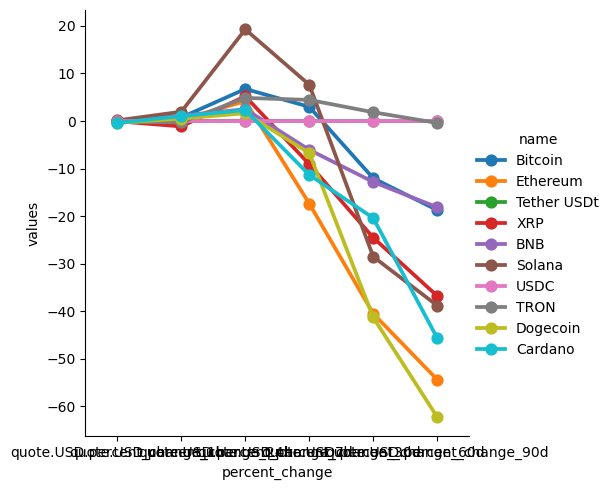

In [231]:
# Seaborn visualization

sns.catplot(x = 'percent_change', y = 'values', hue = 'name', data = df6, kind = 'point')

In [234]:
# Hard to see the x-axis labels due to the length of the column names in the table

# So we want to change the names in the table

df6['percent_change'] = df6['percent_change'].replace(['quote.USD.percent_change_1h'], ['1hour'])
df6['percent_change'] = df6['percent_change'].replace(['quote.USD.percent_change_24h'], ['24hours'])
df6['percent_change'] = df6['percent_change'].replace(['quote.USD.percent_change_7d'], ['7days'])
df6['percent_change'] = df6['percent_change'].replace(['quote.USD.percent_change_30d'], ['30days'])
df6['percent_change'] = df6['percent_change'].replace(['quote.USD.percent_change_60d'], ['60days'])
df6['percent_change'] = df6['percent_change'].replace(['quote.USD.percent_change_90d'], ['90days'])

df6

,name,percent_change,values
0,Bitcoin,1hour,-0.02577
1,Bitcoin,24hours,0.74523
2,Bitcoin,7days,6.73686
3,Bitcoin,30days,2.99610
4,Bitcoin,60days,-12.02550
5,Bitcoin,90days,-18.73071
6,Ethereum,1hour,-0.01318
7,Ethereum,24hours,0.27017
8,Ethereum,7days,4.17934
9,Ethereum,30days,-17.35110


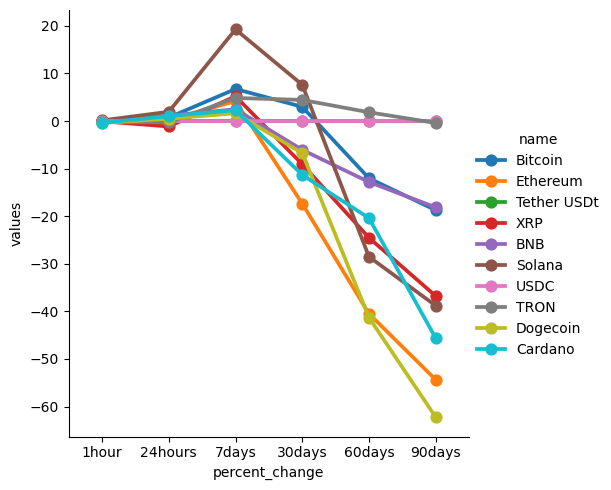

In [235]:
# Now we'll rerun the visualization

sns.catplot(x = 'percent_change', y = 'values', hue = 'name', data = df6, kind = 'point')

In [238]:
# What is we just want to look at Bitcoin?

# First we'll pull all of the data and fields we want

df7 = df[['name', 'quote.USD.price', 'timestamp']]

df7

,name,quote.USD.price,timestamp
0,Bitcoin,85029.51168,2025-04-17 17:29:44.843819
1,Ethereum,1589.18332,2025-04-17 17:29:44.843819
2,Tether USDt,1.00006,2025-04-17 17:29:44.843819
3,XRP,2.07427,2025-04-17 17:29:44.843819
4,BNB,591.71679,2025-04-17 17:29:44.843819
...,...,...,...
75,Solana,134.79712,2025-04-17 18:27:55.811354
76,USDC,0.99997,2025-04-17 18:27:55.811354
77,TRON,0.24789,2025-04-17 18:27:55.811354
78,Dogecoin,0.15615,2025-04-17 18:27:55.811354


In [240]:
# Now we'll query the data to only show Bitcoin

df7 = df[['name', 'quote.USD.price', 'timestamp']]
df7 = df7.query("name == 'Bitcoin'")

df7

,name,quote.USD.price,timestamp
0,Bitcoin,85029.51168,2025-04-17 17:29:44.843819
10,Bitcoin,85029.51168,2025-04-17 17:30:45.312219
20,Bitcoin,85026.87733,2025-04-17 17:31:45.803572
30,Bitcoin,84919.24352,2025-04-17 17:38:57.047955
40,Bitcoin,84907.07802,2025-04-17 18:17:37.695648
50,Bitcoin,84897.00685,2025-04-17 18:18:42.361148
60,Bitcoin,84935.16628,2025-04-17 18:25:31.587351
70,Bitcoin,84915.15388,2025-04-17 18:27:55.811354


In [241]:
# Now we only have the data for Bitcoin

<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

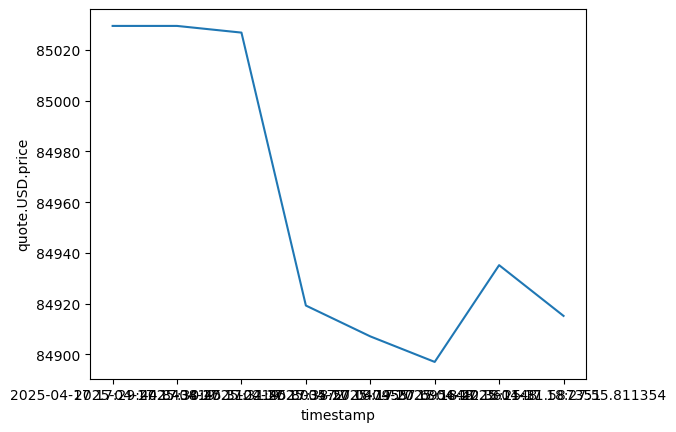

In [243]:
# If we want to see this in a simple visualization we can do as follows

sns.lineplot(x = 'timestamp', y = 'quote.USD.price', data = df7)

<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

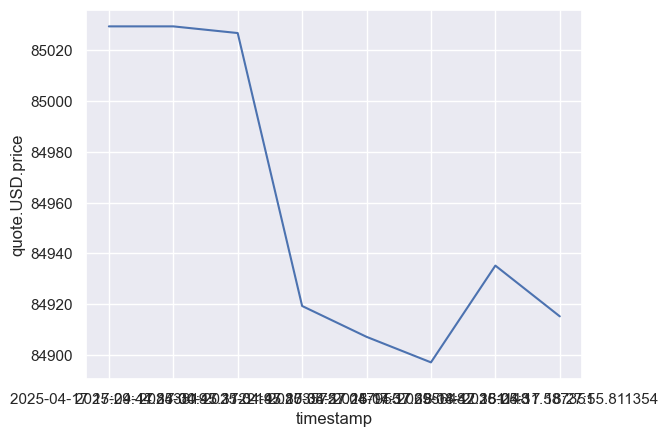

In [244]:
# That doesn't look the best we could modify the timestamp format but we're just going to try and make it 
# little more readable with adding a theme/style

sns.set_theme(style = 'darkgrid')

sns.lineplot(x = 'timestamp', y = 'quote.USD.price', data = df7)